In [4]:
!pip install pyedflib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 26.9 MB/s eta 0:00:00


In [2]:
!pip install ipympl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.7 MB/s eta 0:00:00


In [6]:
!pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 8.1 MB/s eta 0:00:00


In [28]:
%matplotlib ipympl
from pyedflib import highlevel
import pyedflib as plib
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import control as ctl
pi = np.pi

In [29]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [30]:
path = "4.edf"
signals, signal_headers, header = highlevel.read_edf(path)

In [32]:
n = len(signals)
canal = 2021007366 % 20

amostras = len (signals[canal])

print(signal_headers[canal])
fs = 200
Ts = 1/fs
t = np.arange(0,amostras*Ts,Ts)
print(signals[canal])

{'label': 'T3-REF', 'dimension': 'uV', 'sample_rate': 200.0, 'sample_frequency': 200.0, 'physical_max': 200.0, 'physical_min': -200.0, 'digital_max': 2048, 'digital_min': -2048, 'prefilter': 'LP:70Hz HP:0.1Hz N:60Hz', 'transducer': ''}
[  0.         0.         0.       ...   5.46875  -23.046875   3.125   ]


In [20]:
def plot_signal(signal: np.ndarray, time: np.ndarray, frequency: float, limite=800):
    """
        Plota um sinal no domínio do tempo e sua resposta em frequência.

        Params:
            signal (np.ndarray): O sinal a ser plotado.
            time (np.ndarray): O array de tempos correspondente ao sinal.
            frequency (float): A frequência de amostragem do sinal (em Hz).
            limite (float, opcional): O limite superior do eixo x da resposta em frequência.
    """
    # Plotar o sinal no domínio do tempo
    plt.figure(figsize=(10, 4))
    plt.plot(time, signal)
    plt.title('Sinal')
    plt.xlabel('Tempo [s]')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

    # Resposta em frequência (FFT)
    frequencia_fft = np.fft.fftfreq(len(signal), 1/frequency)
    espectro_fft = np.fft.fft(signal)

    # Plotar a magnitude da resposta em frequência
    plt.figure(figsize=(10, 4))
    plt.plot(frequencia_fft[:len(frequencia_fft)//2], np.abs(espectro_fft)[:len(espectro_fft)//2])
    plt.title('Resposta em frequência do sinal')
    plt.xlabel('Frequência [Hz]')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.xlim(0, limite)
    plt.show()

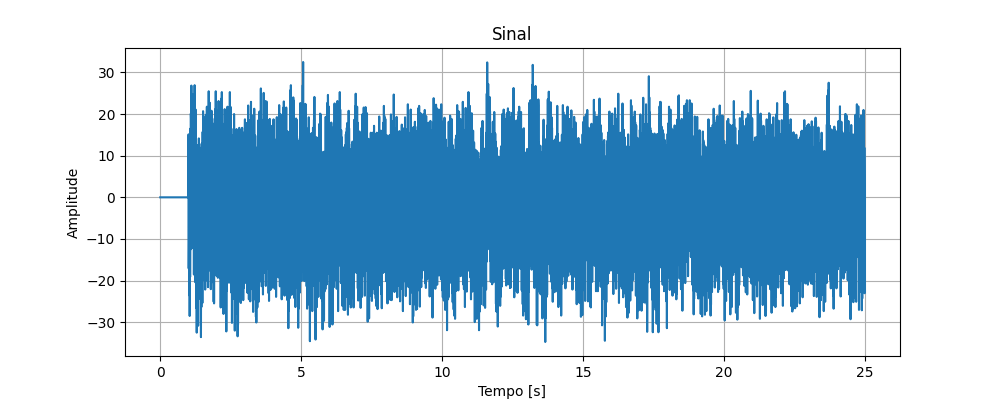

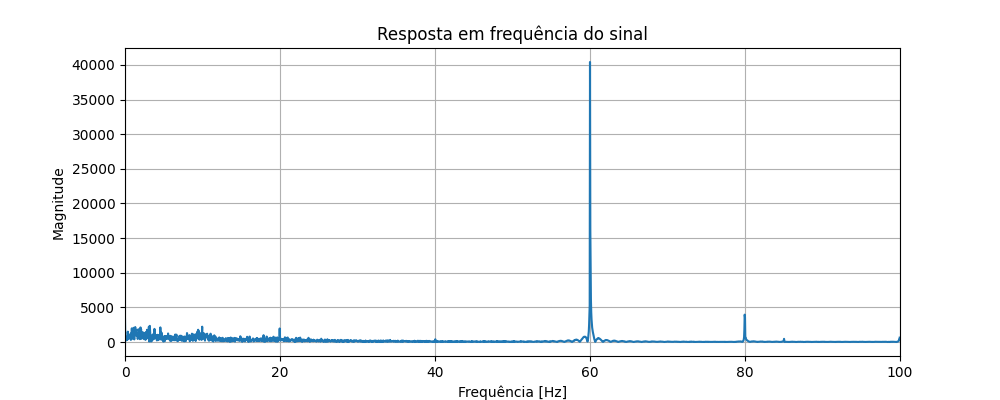

In [35]:
s = signals[canal]
plot_signal(s, t, fs, limite=100)

In [60]:
bandas_rejeitadas = [18, 22, 55, 65, 75, 85]

kernel = signal.firwin(101, bandas_rejeitadas, pass_zero='bandstop', window="hamming", fs=fs)


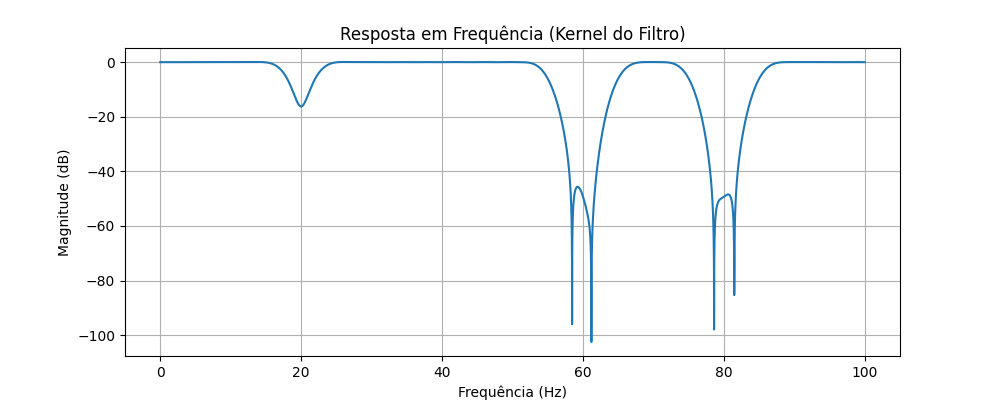

In [61]:
plt.figure(figsize=(10, 4))
w, H = signal.freqz(kernel, worN=8000, fs=fs)
plt.plot(w, 20 * np.log10(abs(H)))  # Magnitude em dB
plt.title("Resposta em Frequência (Kernel do Filtro)")
plt.ylabel("Magnitude (dB)")
plt.xlabel("Frequência (Hz)")
plt.grid()
# plt.xlim(0, 2000)

In [55]:
def cortar_transitorio(sinal,filtrado):
    dif = len(filtrado) - len(sinal)
    if dif % 2 == 0:
        return filtrado[int(dif/2):len(filtrado)-int(dif/2)]
    else:
        return filtrado[int(dif/2):len(filtrado)-int(dif/2)-1]

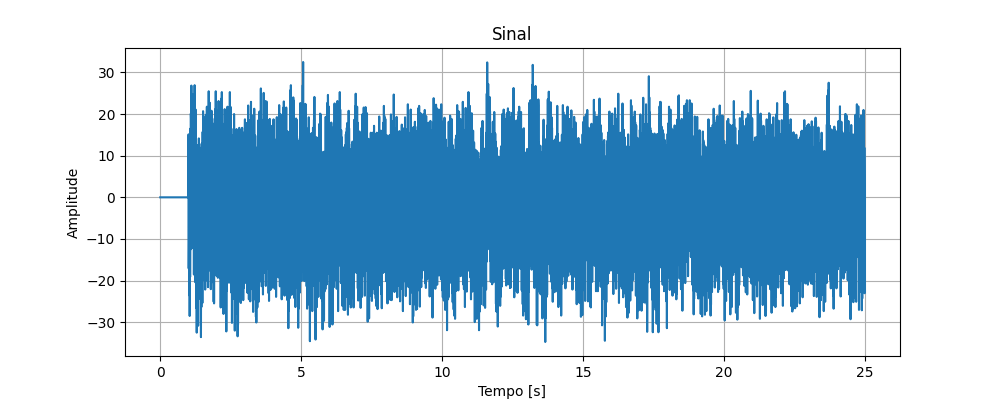

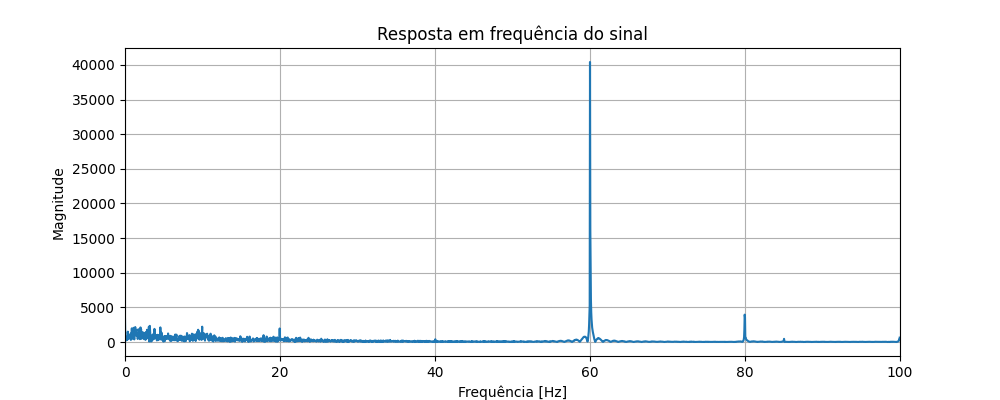

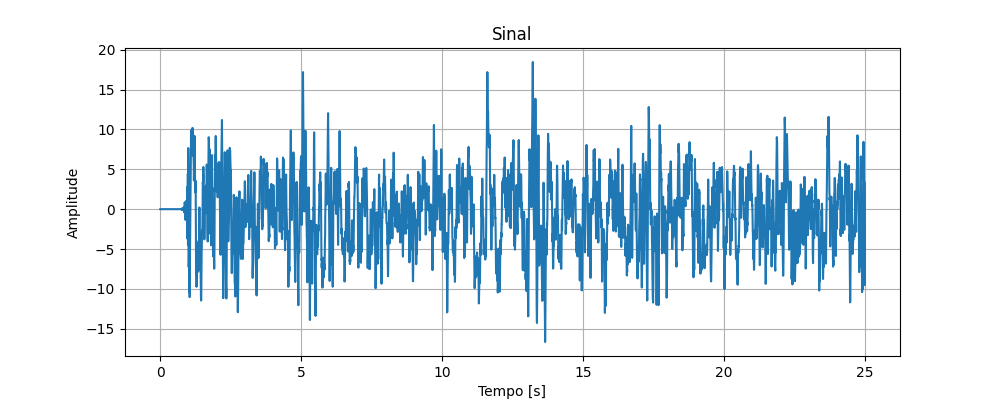

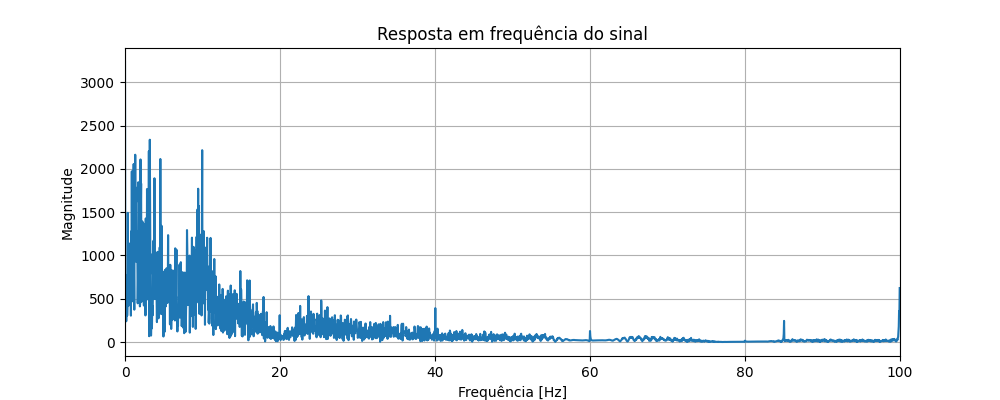

In [62]:
sinal_filtrado = np.convolve(s, kernel)

sinal_filtrado_ = cortar_transitorio(s, sinal_filtrado)
plot_signal(s, t, 1/Ts, limite=100)
plot_signal(sinal_filtrado_, t, 1/Ts, limite=100)

# EX 4

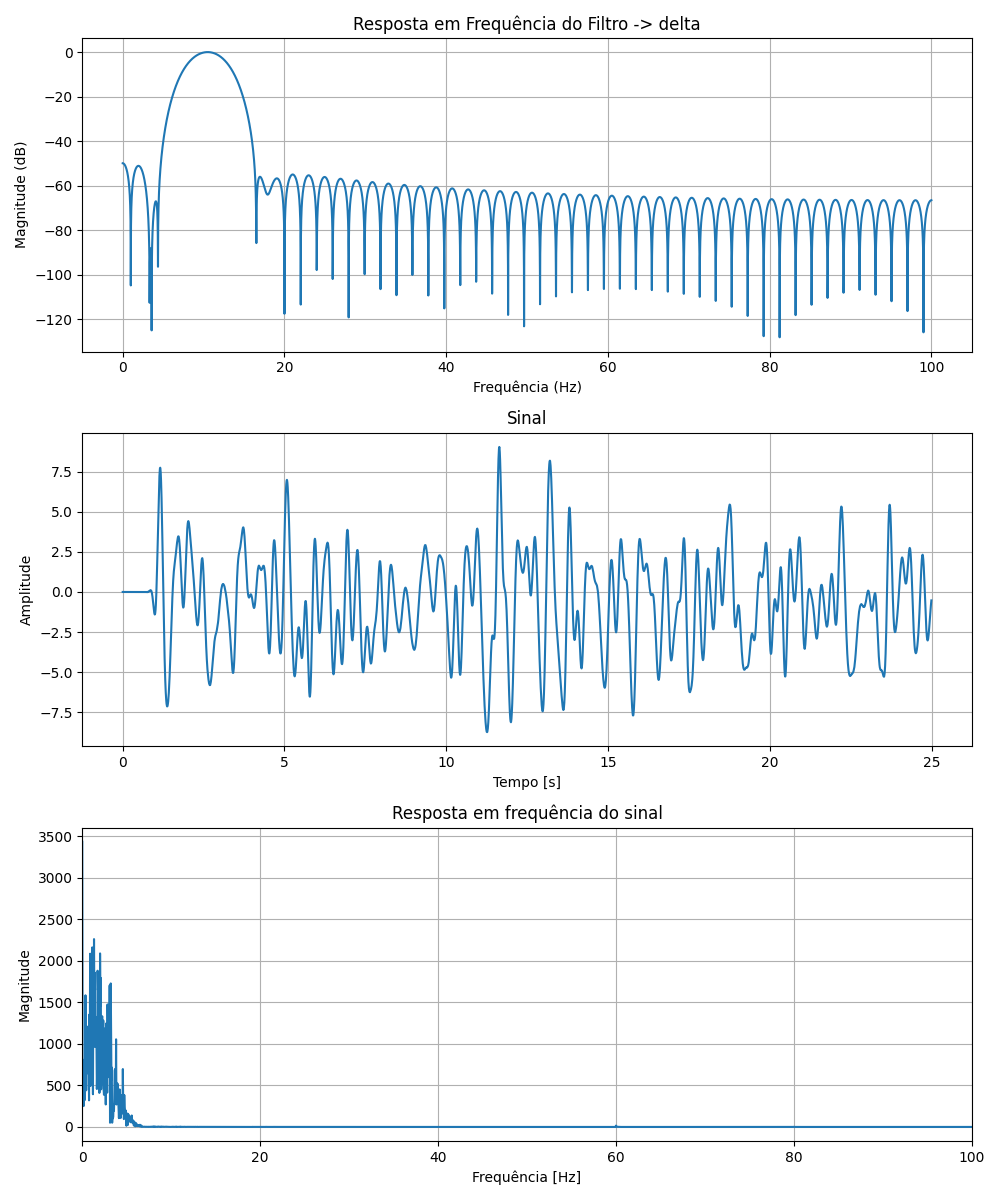

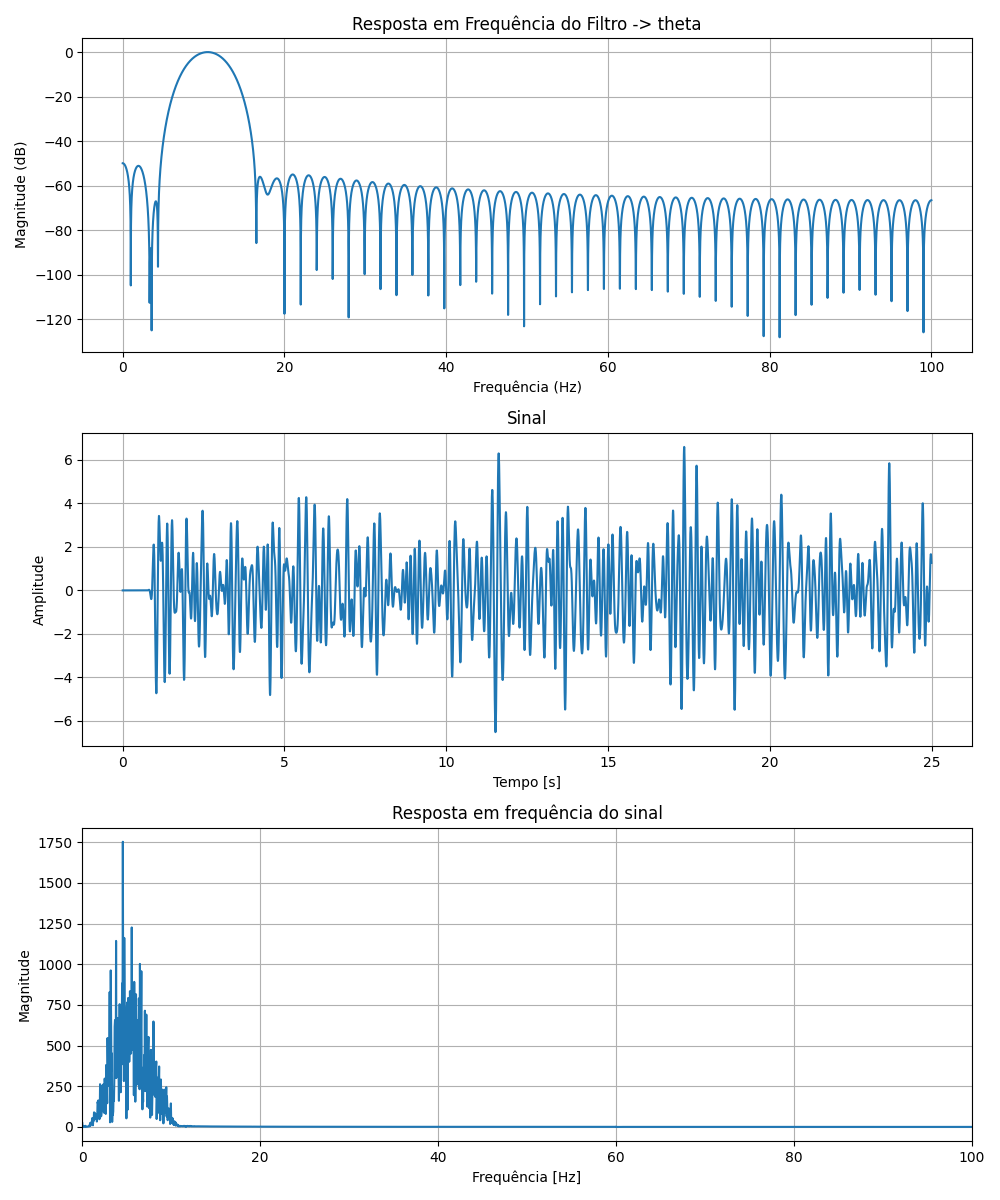

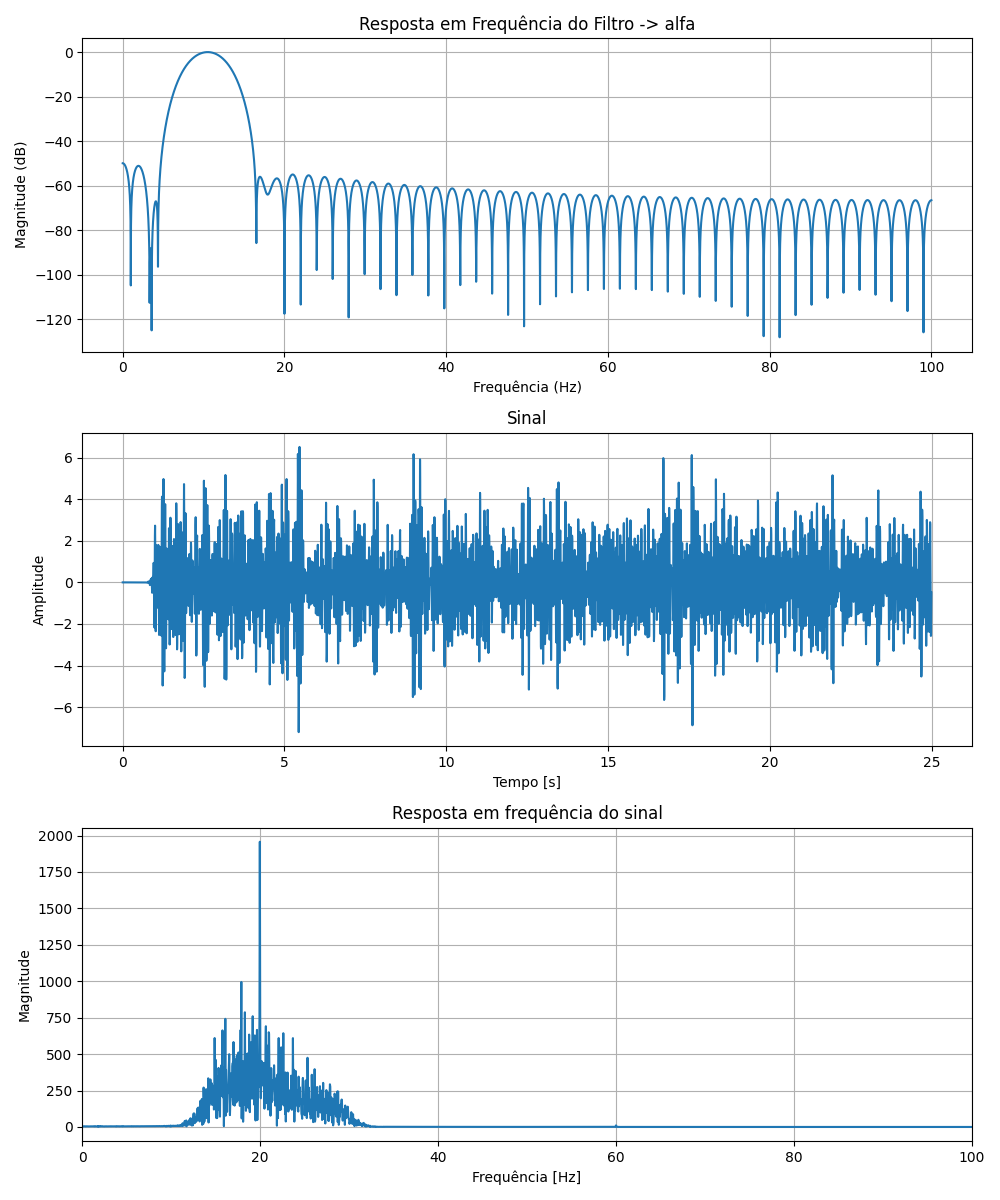

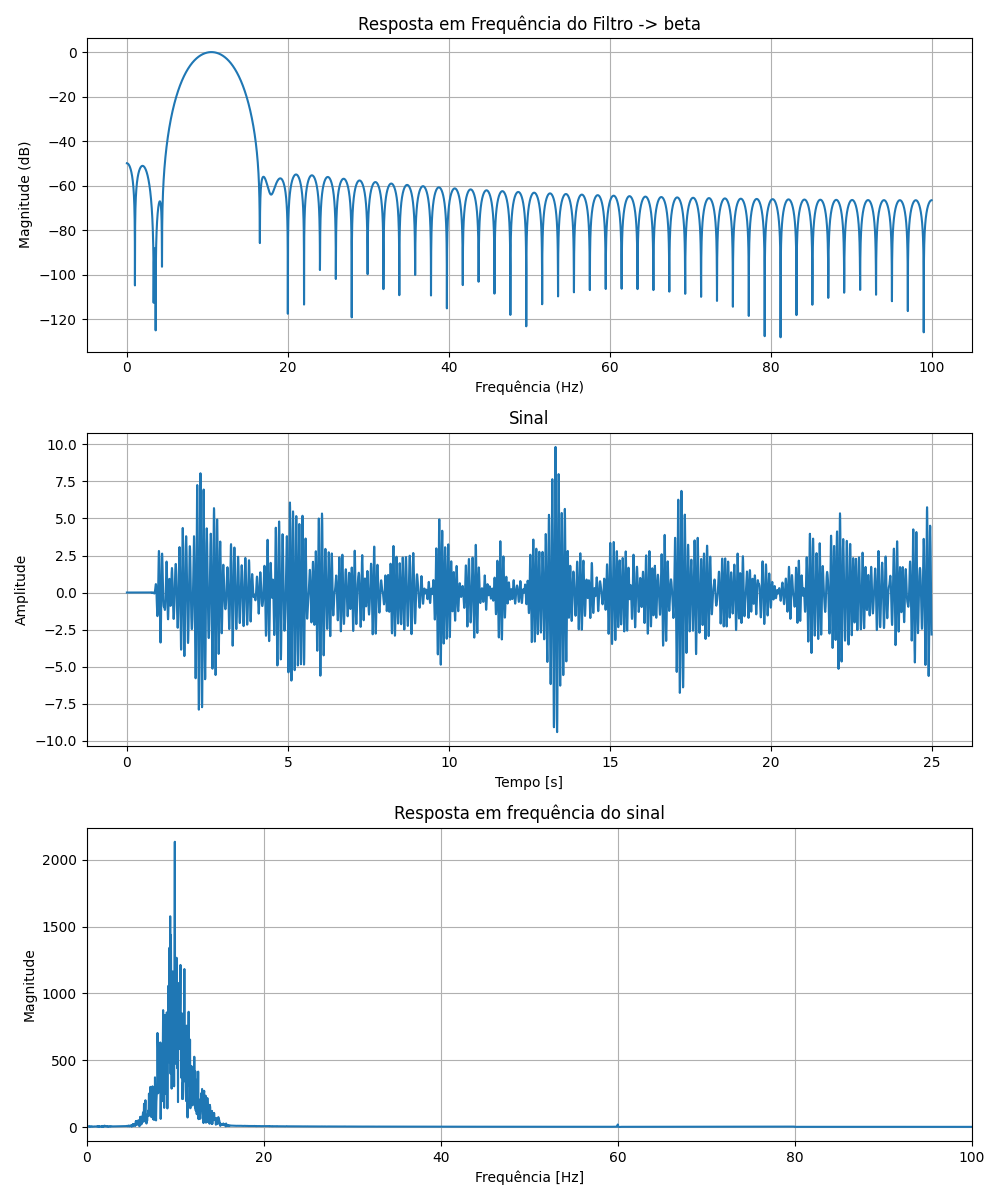

In [65]:
bandas = {
  "delta": [0.2, 3.7],
  "theta": [3.8, 7.7],
  "alfa": [14, 30],
  "beta": [8, 13]
}


for atividade, banda in bandas.items():
  kernel = signal.firwin(101, banda, pass_zero='bandpass', window="hamming", fs=fs)

  sinal_filtrado = np.convolve(s, kernel)
  sinal_filtrado_ = cortar_transitorio(s, sinal_filtrado)



  fig, axs = plt.subplots(3, 1, figsize=(10, 12))  # 3 linhas, 1 coluna
  axs[0].plot(w, 20 * np.log10(abs(H)))  # Magnitude em dB
  axs[0].set_title(f"Resposta em Frequência do Filtro -> {atividade}")
  axs[0].set_ylabel("Magnitude (dB)")
  axs[0].set_xlabel("Frequência (Hz)")
  axs[0].grid()

  # Sinal no domínio do tempo
  axs[1].plot(t, sinal_filtrado_)
  axs[1].set_title("Sinal")
  axs[1].set_xlabel("Tempo [s]")
  axs[1].set_ylabel("Amplitude")
  axs[1].grid(True)

  # Resposta em frequência (FFT)
  frequencia_fft = np.fft.fftfreq(len(sinal_filtrado_), 1/fs)
  espectro_fft = np.fft.fft(sinal_filtrado_)
  axs[2].plot(frequencia_fft[:len(frequencia_fft)//2], np.abs(espectro_fft)[:len(espectro_fft)//2])
  axs[2].set_title("Resposta em frequência do sinal")
  axs[2].set_xlabel("Frequência [Hz]")
  axs[2].set_ylabel("Magnitude")
  axs[2].grid(True)
  axs[2].set_xlim(0, 100)

  # Ajustar espaçamento entre subplots
  plt.tight_layout()
  # Mostrar os subplots
  plt.show()




